Dataset used:
- NYC Open Data: "NYPD Complaint Data Current (Year To Date)" (filtered to the current year)

https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243/about_data

Analysis question:
How do different types of reported crimes vary across boroughs in NYC in this current year?

Columns that will be used:
- RPT_DT (report date)
- BORO_NM (borough name)
- OFNS_DESC (offense description / crime type)
- LAW_CAT_CD (legal category: felony / misdemeanor / violation)

Hypothesis:
In the current year, Brooklyn and Manhattan will have the highest number of reported crimes in absolute terms (due to their high population size), but the Bronx will have a higher share of serious offenses (felonies) compared with other boroughs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = "NYPD_Complaint_Data_Current_(Year_To_Date)_20251129.csv"

df = pd.read_csv(file_path, low_memory=False)

In [ ]:
df.shape
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,303250435,13,MANHATTAN,03/20/2025,00:30:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,25-44,WHITE,M,988886,207857,40.737203,-73.983273,"(40.7372030985741, -73.9832725981497)",POINT (-73.9832725981497 40.7372030985741)
1,298788022,81,BROOKLYN,01/02/2025,01:50:00,01/02/2025,03:00:00,COMPLETED,(null),NaN,...,NaN,18-24,WHITE,F,1005319,190473,40.689464,-73.924029,"(40.6894642952604, -73.9240290899499)",POINT (-73.9240290899499 40.6894642952604)
2,307271594,47,BRONX,03/05/2025,17:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,25-44,BLACK,F,1026480,262584,40.887314,-73.847272,"(40.8873136344706, -73.8472717577564)",POINT (-73.8472717577564 40.8873136344706)
3,306868358,9,MANHATTAN,05/22/2025,14:30:00,05/22/2025,14:45:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,M,0,0,0.000000,0.000000,"(0.0, 0.0)",POINT (0 0)
4,309137838,14,MANHATTAN,07/05/2025,18:00:00,07/05/2025,18:31:00,COMPLETED,(null),NaN,...,NaN,18-24,BLACK,F,0,0,0.000000,0.000000,"(0.0, 0.0)",POINT (0 0)


In [6]:
df.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'New Georeferenced Column'],
      dtype='object')

In [9]:
cols_keep = ["RPT_DT", "BORO_NM", "OFNS_DESC", "LAW_CAT_CD"]

df_small = df[cols_keep].copy()

df_small.head()

,RPT_DT,BORO_NM,OFNS_DESC,LAW_CAT_CD
0,03/20/2025,MANHATTAN,RAPE,FELONY
1,01/02/2025,BROOKLYN,RAPE,FELONY
2,05/30/2025,BRONX,RAPE,FELONY
3,05/22/2025,MANHATTAN,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR
4,07/05/2025,MANHATTAN,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR


In [12]:
df_small["RPT_DT"] = pd.to_datetime(
    df_small["RPT_DT"],
    errors="coerce"   
)

df_small = df_small.dropna(subset=["RPT_DT", "BORO_NM", "OFNS_DESC"])

df_small["RPT_DT"].dt.year.value_counts().sort_index()


RPT_DT
2025    438556
Name: count, dtype: int64

In [13]:
borough_counts = (
    df_small
    .groupby("BORO_NM")
    .size()
    .reset_index(name="n_complaints")
    .sort_values("n_complaints", ascending=False)
)

borough_counts

,BORO_NM,n_complaints
2,BROOKLYN,122257
3,MANHATTAN,103595
1,BRONX,99029
4,QUEENS,94000
5,STATEN ISLAND,18706
0,(null),969


In [16]:
borough_counts_clean = borough_counts[borough_counts["BORO_NM"] != "(null)"].copy()
borough_counts_clean

,BORO_NM,n_complaints
2,BROOKLYN,122257
3,MANHATTAN,103595
1,BRONX,99029
4,QUEENS,94000
5,STATEN ISLAND,18706


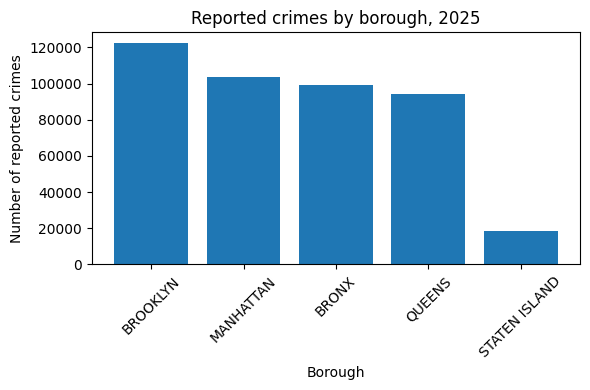

In [21]:
plt.figure(figsize=(6, 4))

plt.bar(
    borough_counts_clean["BORO_NM"],
    borough_counts_clean["n_complaints"]
)

plt.xlabel("Borough")
plt.ylabel("Number of reported crimes")
plt.title("Reported crimes by borough, 2025")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [22]:
df_small = df_small[df_small["BORO_NM"] != "(null)"].copy()

df_small["BORO_NM"].unique()

array(['MANHATTAN', 'BROOKLYN', 'BRONX', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

In [23]:
df_small["LAW_CAT_CD"].value_counts()

LAW_CAT_CD
MISDEMEANOR    226713
FELONY         142010
VIOLATION       68864
Name: count, dtype: int64

In [24]:
total_by_boro = (
    df_small
    .groupby("BORO_NM")
    .size()
    .reset_index(name="total_n")
)

total_by_boro

,BORO_NM,total_n
0,BRONX,99029
1,BROOKLYN,122257
2,MANHATTAN,103595
3,QUEENS,94000
4,STATEN ISLAND,18706


In [25]:
felony_by_boro = (
    df_small[df_small["LAW_CAT_CD"] == "FELONY"]
    .groupby("BORO_NM")
    .size()
    .reset_index(name="n_felony")
)

felony_by_boro

,BORO_NM,n_felony
0,BRONX,34223
1,BROOKLYN,38891
2,MANHATTAN,33571
3,QUEENS,30378
4,STATEN ISLAND,4947


In [26]:
felony_share = felony_by_boro.merge(
    total_by_boro,
    on="BORO_NM",
    how="left"
)

felony_share["felony_share"] = felony_share["n_felony"] / felony_share["total_n"]

felony_share


,BORO_NM,n_felony,total_n,felony_share
0,BRONX,34223,99029,0.345586
1,BROOKLYN,38891,122257,0.318109
2,MANHATTAN,33571,103595,0.324060
3,QUEENS,30378,94000,0.323170
4,STATEN ISLAND,4947,18706,0.264461


In [28]:
boro_law_long = (
    df_small
    .groupby(["BORO_NM", "LAW_CAT_CD"])
    .size()
    .reset_index(name="n")
)

boro_law_long

,BORO_NM,LAW_CAT_CD,n
0,BRONX,FELONY,34223
1,BRONX,MISDEMEANOR,49430
2,BRONX,VIOLATION,15376
3,BROOKLYN,FELONY,38891
4,BROOKLYN,MISDEMEANOR,62160
5,BROOKLYN,VIOLATION,21206
6,MANHATTAN,FELONY,33571
7,MANHATTAN,MISDEMEANOR,56344
8,MANHATTAN,VIOLATION,13680
9,QUEENS,FELONY,30378


In [30]:
boro_law_wide = boro_law_long.pivot(
    index="BORO_NM",
    columns="LAW_CAT_CD",
    values="n"
)

boro_law_wide = boro_law_wide[["FELONY", "MISDEMEANOR", "VIOLATION"]]

boro_law_wide


LAW_CAT_CD,FELONY,MISDEMEANOR,VIOLATION
BORO_NM,,,
BRONX,34223,49430,15376
BROOKLYN,38891,62160,21206
MANHATTAN,33571,56344,13680
QUEENS,30378,48689,14933
STATEN ISLAND,4947,10090,3669


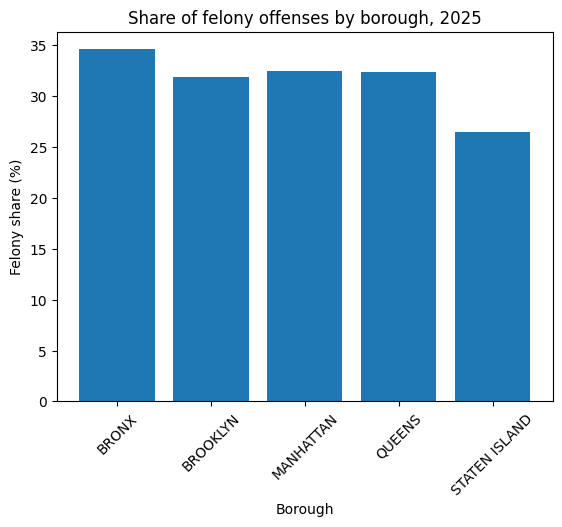

In [27]:
felony_share["felony_percent"] = felony_share["felony_share"] * 100

plt.bar(
    felony_share["BORO_NM"],
    felony_share["felony_percent"]
)

plt.xlabel("Borough")
plt.ylabel("Felony share (%)")
plt.title("Share of felony offenses by borough, 2025")

plt.xticks(rotation=45)

plt.show()

## Methods

I work with the **NYPD Complaint Data: Current Year to Date** from NYC Open Data especially focusing on 2025. From the full dataset I keep four variables that are directly relevant to borough-level crime patterns, which are respectively the report date (`RPT_DT`), borough (`BORO_NM`), offense description (`OFNS_DESC`), and law category (`LAW_CAT_CD`).

I first clean the data by converting `RPT_DT` to a datetime object to keep only records from 2025, and drop rows with missing dates, boroughs, or offense descriptions. I also remove a small number of observations where the borough is recorded as `"(null)"`, so that the analysis focuses on the five main boroughs.

To summarize crime patterns, I group the data in several ways. I group by `BORO_NM` to compute the total number of offenses in each borough, and I group the subset with `LAW_CAT_CD == "FELONY"` to obtain felony counts. I then merge these summaries to calculate, for each borough, the share of reported offenses that are felonies. In addition, I group by both `BORO_NM` and `LAW_CAT_CD` and use a `pivot` operation to reshape the result into a borough-by-law-category table that shows counts of felonies, misdemeanors, and violations.

Finally, I use bar charts in `matplotlib` to visualize the total offense counts by borough and the percentage of offenses that are classified as felonies in each borough.

## Results: Overall volume of reported crimes

The first figure visualization shows us the total number of reported offenses in 2025 by borough. We can see that Brooklyn has the largest number of recorded incidents (about 122,000), followed by Manhattan, the Bronx, and Queens. Staten Island has by far the fewest cases. （The result is actually aligned with our previous hypothesis.）This means that, in absolute terms, most of the NYPD complaint records in 2025 come from Brooklyn and Manhattan, which is consistent with their larger populations and higher levels of daily activity.

### Share of felony offenses

The second figure focuses on the *composition* of crime by looking at the share of felony offenses in each borough.  
Here, we can see that Bronx has roughly **35%** of reported offenses classified as felonies, compared with about **32–33%** in Brooklyn, Manhattan, and Queens, and about **26%** in Staten Island. However, we can also say that this difference in precentage is rather small and might not be significant statiscally.

In other words, while Brooklyn generates the highest number of crime complaints overall, the **felony situation in the Bronx is relatively more serious**, with a higher proportion of offenses being classified as felonies.
This suggests that resource allocation decisions (for example, patrols, investigations, or social services) may need to consider not only how many incidents occur in each borough, but also how serious those incidents tend to be.